In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np


In [9]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
#csv_path

In [15]:
# Here we have data each 10 minutes
df = pd.read_csv(csv_path)
#df

df = df[5::6]
df

In [17]:
# Now we want datas each an hour
df = df[5::6]
#df

In [21]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
#df[:5]
df.shape

(70091, 15)

<AxesSubplot:xlabel='Date Time'>

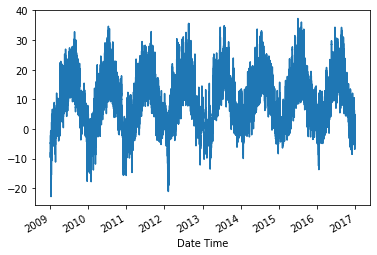

In [20]:
temp = df['T (degC)']
temp.plot()

Vamos entrar com 5 dados e prever o sexto

In [22]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [34]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
print(X1.shape)
print(y1.shape)
print(X1[0])
print(y1[0])

(70086, 5, 1)
(70086,)
[[-8.05]
 [-8.88]
 [-8.81]
 [-9.05]
 [-9.63]]
-9.67


In [35]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [37]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Rodar treinamento
X_train e y_train servirá de treino
Será validado com X_val1 e y_val1
X_test1 e y_test1 não são conhecidos pelo modelo. Servirá para treinarmos


In [38]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 25.5831 - root_mean_squared_error: 5.0580

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 7ms/step - loss: 25.3939 - root_mean_squared_error: 5.0392 - val_loss: 1.0726 - val_root_mean_squared_error: 1.0357
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 1.5049 - root_mean_squared_error: 1.2267

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 1.5033 - root_mean_squared_error: 1.2261 - val_loss: 0.6102 - val_root_mean_squared_error: 0.7811
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.8421 - root_mean_squared_error: 0.9176

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.8424 - root_mean_squared_error: 0.9178 - val_loss: 0.5383 - val_root_mean_squared_error: 0.7337
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7147 - root_mean_squared_error: 0.8454

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.7139 - root_mean_squared_error: 0.8449 - val_loss: 0.5086 - val_root_mean_squared_error: 0.7132
Epoch 5/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.6769 - root_mean_squared_error: 0.8228

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6766 - root_mean_squared_error: 0.8226 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7100
Epoch 6/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.6641 - root_mean_squared_error: 0.8149

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6633 - root_mean_squared_error: 0.8144 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7057
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.6566 - root_mean_squared_error: 0.8103

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6567 - root_mean_squared_error: 0.8104 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6512 - root_mean_squared_error: 0.8070 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7041
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6496 - root_mean_squared_error: 0.8060 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040


Importar modelo

In [39]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

Testar

In [40]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
0,-9.926201,-9.67
1,-9.775289,-9.17
2,-8.905871,-8.10
3,-7.384284,-7.66
4,-7.302746,-7.04
...,...,...
59995,6.018103,6.07
59996,7.296629,9.88
59997,12.347847,13.53
59998,16.238441,15.43


Imprimir resultados

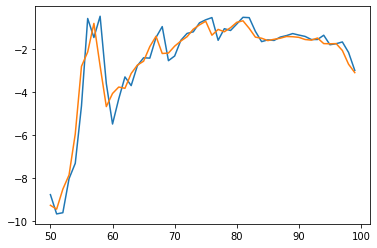

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])